In [1]:
import numpy as np

def make_grid(Y,X):
    return np.zeros((Y,X),dtype=bool)

grid=make_grid(5,6)
grid

array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]])

In [2]:
def set_on_random_cells(grid, n):
    import random

    _grid = grid.reshape((-1,))
    _grid[np.random.choice(_grid.size, n, replace=False)] = True
    return _grid.reshape(grid.shape)

grid = set_on_random_cells(grid, 15)
grid

array([[False,  True, False, False,  True,  True],
       [False, False, False,  True,  True, False],
       [False,  True,  True, False, False, False],
       [False,  True,  True,  True, False,  True],
       [ True, False, False,  True,  True,  True]])

In [3]:
def display_grid(grid):
    return '\n'.join(''.join('■' if c else '□' for c in row) for row in grid)

print(display_grid(grid))

□■□□■■
□□□■■□
□■■□□□
□■■■□■
■□□■■■


In [4]:
def calc_grid(grid):
    def nb_neighbors(y, x):
        nn = 0
        for dx in (-1, 0, 1):
            for dy in (-1, 0, 1):
                if dx == dy == 0:
                    continue
                xp, yp = x + dx, y + dy
                if xp >= 0 and yp >= 0 and xp < X and yp < Y and grid[yp, xp]:
                    nn += 1
        return nn

    Y, X = grid.shape
    new_grid = make_grid(Y, X)
    for y in range(Y):
        for x in range(X):
            nbn = nb_neighbors(y, x)
            v = grid[y, x]
            if v:
                new_grid[y, x] = 2 <= nbn <= 3
            elif nbn == 3:
                new_grid[y, x] = True
    return new_grid

In [10]:
grid = calc_grid(grid)
print(display_grid(grid))

□□□□□□
□■■□□□
■■□□□□
■■□□■■
□□□□□□


In [11]:
conway = np.array(
    [
        [0, 0, 1, 1, 1, 0, 0],
        [0, 0, 1, 0, 1, 0, 0],
        [0, 0, 1, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 0, 0],
        [1, 0, 1, 1, 1, 0, 0],
        [0, 1, 0, 1, 0, 1, 0],
        [0, 0, 0, 1, 0, 0, 1],
        [0, 0, 1, 0, 1, 0, 0],
        [0, 0, 1, 0, 1, 0, 0],
    ]
)

grid = make_grid(20, 17)
x0, y0 = 5, 8
grid[y0 : y0 + conway.shape[0], x0 : x0 + conway.shape[1]] = conway
print(display_grid(grid))

□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□
□□□□□□□■■■□□□□□□□
□□□□□□□■□■□□□□□□□
□□□□□□□■□■□□□□□□□
□□□□□□□□■□□□□□□□□
□□□□□■□■■■□□□□□□□
□□□□□□■□■□■□□□□□□
□□□□□□□□■□□■□□□□□
□□□□□□□■□■□□□□□□□
□□□□□□□■□■□□□□□□□
□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□


In [46]:
grid = calc_grid(grid)
print(display_grid(grid))

□□□□□□□□□□□□□□■■□
□□□□□□□□□□□□□□■■□
□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□
□□□□□□□□□□□□□□□□□


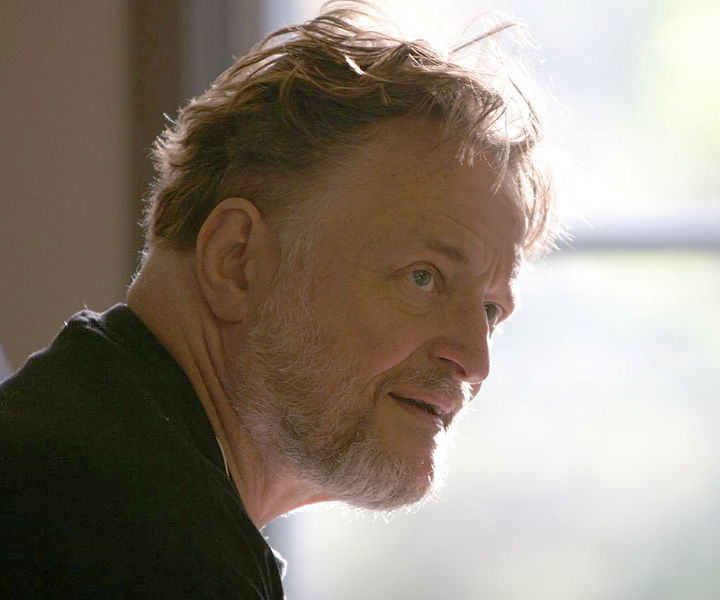

In [48]:
from PIL import Image

fn='2020-04-19_22-28-14_720px-John_H_Conway_2005_(cropped).jpg'
im=Image.open(fn)
im

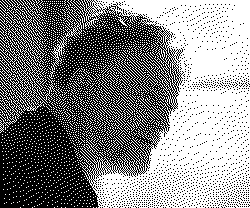

In [49]:
w,h=im.size
W=250
im=im.resize((W,int(W*h/w)))
im=im.convert('1')
im

In [50]:
def make_grid_from_image(fn, width=None):
    im = Image.open(fn)
    if width:
        w, h = im.size
        im = im.resize((width, int(width / w * h)))
    im = im.convert("1")
    w,h=im.size
    flat_grid=np.logical_not(np.array(im.getdata()))
    grid=flat_grid.reshape((h,w))
    return grid

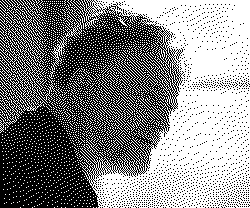

In [51]:
def display_image_from_grid(grid):
    Y,X=grid.shape
    im=Image.new(mode='1',size=(X,Y))
    im.putdata(np.logical_not(grid.reshape((-1,))))
    return im

grid=make_grid_from_image(fn,250)
display_image_from_grid(grid)

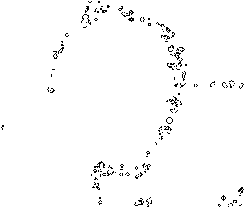

In [61]:
grid=calc_grid(grid)
display_image_from_grid(grid)

In [ ]:
def make_gif_from_grid(grid, fn, nb_frames=100, duration=250):
    im0 = display_image_from_grid(grid)
    ims = []
    for _ in range(nb_frames):
        grid = calc_grid(grid)
        # Need to convert image to "p" otherwise PIL complains about palette missing
        ims.append(display_image_from_grid(grid).convert("P"))

    im0.convert("P").save(
        fn, save_all=True, append_images=ims, duration=duration, loop=0
    )

import os.path
gfn=os.path.join(os.path.dirname(fn),'conway.gif')
grid=make_grid_from_image(fn,250)
make_gif_from_grid(grid,gfn)